# Regrecion Lineal en modelado RamdomForest 



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('properties_EDA_final2.csv')
print(" Dataset cargado correctamente. Filas y columnas:", df.shape)
display(df.head())

✅ Dataset cargado correctamente. Filas y columnas: (585, 20)


,administración,estrato,antiguedad,área,habitaciones,baños,garajes,elevadores,tipo_de_inmueble,porteria,precio,Localidad,Tasa_Homicidios_100k,Tasa_Hurtos_100k,incluye_remodelado,incluye_deposito,incluye_zona_de_lavanderia,incluye_gas,incluye_parqueadero,log_precio
0,532000,4,37,86.0,1,1,1,1,Apartamento,24 hrs,313900000.0,CHAPINERO,5.2,1050.0,True,False,False,True,False,19.564585
1,0,6,7,77.0,1,2,2,1,Apartamento,24 hrs,440100000.0,USAQUEN,8.5,850.0,True,True,False,True,True,19.902513
2,811893,4,14,109.0,3,4,2,1,Apartamento,24 hrs,495000000.0,USAQUEN,8.5,850.0,True,False,False,True,True,20.020068
3,400200,4,11,76.0,3,2,1,2,Apartamento,24 hrs,442300000.0,SUBA,9.8,750.0,True,False,False,True,True,19.907499
4,270000,4,20,105.0,4,2,1,0,Casa,24 hrs,387000000.0,USAQUEN,8.5,850.0,True,True,False,True,True,19.773935


##### Definir variable objetivo (Y) y características (X). Usamos log_precio como variable objetivo (según tu EDA)
 Eliminamos precio y log_precio del conjunto X

In [ ]:

Y = df['log_precio']
X = df.drop(['precio', 'log_precio'], axis=1)  

####  Dividir variables numéricas y categóricas

In [ ]:

numeric_cols = ['administración', 'área', 'Tasa_Homicidios_100k', 'Tasa_Hurtos_100k']
categorical_cols = ['Localidad', 'tipo_de_inmueble', 'porteria']

#### One-Hot Encoding para variables categóricas

In [ ]:

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:

all_numeric_cols = list(X.select_dtypes(include=np.number).columns)

#### Dividir en entrenamiento 80% y prueba 20%

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(" Tamaños de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

📊 Tamaños de los conjuntos:
Entrenamiento: (468, 33), Prueba: (117, 33)


In [7]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[all_numeric_cols] = scaler.fit_transform(X_train[all_numeric_cols])
X_test_scaled[all_numeric_cols] = scaler.transform(X_test[all_numeric_cols])

#### Estandarizar solo variables numéricas

In [ ]:

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[all_numeric_cols] = scaler.fit_transform(X_train[all_numeric_cols])
X_test_scaled[all_numeric_cols] = scaler.transform(X_test[all_numeric_cols])

#### Crear y entrenar el modelo Random Forest

In [ ]:

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Predicciones y evaluación del modelo

In [ ]:

y_pred = rf_model.predict(X_test_scaled)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = rf_model.score(X_test_scaled, y_test)

print("\n Resultados del modelo Random Forest:")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:,.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


📈 Resultados del modelo Random Forest:
RMSE (Raíz del Error Cuadrático Medio): 0.1360
R² (Coeficiente de Determinación): 0.9313


#### Aqui verificamos las variable Importantes son garajes, areá  y estrato
muchas viviendas tienen 0 o 1 garaje, pero los precios suben abruptamente al tener 2 o más, el modelo detecta un salto fuerte y lo usa mucho para dividir los árboles.

In [ ]:

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("\n Variables más importantes:")
display(importances.head(10))


🌲 Variables más importantes:


garajes                 0.603700
área                    0.165247
estrato                 0.088506
administración          0.074322
Localidad_USME          0.014839
antiguedad              0.014608
Tasa_Hurtos_100k        0.007887
baños                   0.005158
elevadores              0.004560
Tasa_Homicidios_100k    0.003713
dtype: float64

In [ ]:
#(Opcional) Guardar el modelo y el scaler para uso futuro
import joblib

joblib.dump(rf_model, "modelo_random_forest.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n Modelo y scaler guardados como 'modelo_random_forest.pkl' y 'scaler.pkl'")


💾 Modelo y scaler guardados como 'modelo_random_forest.pkl' y 'scaler.pkl'


In [14]:
df[['garajes', 'área', 'precio']].corr()


,garajes,área,precio
garajes,1.000000,0.704146,0.800871
área,0.704146,1.000000,0.870218
precio,0.800871,0.870218,1.000000


#### el número de garajes actúa como un excelente predictor de rango socioeconómico o nivel de lujo

<Axes: xlabel='garajes', ylabel='log_precio'>

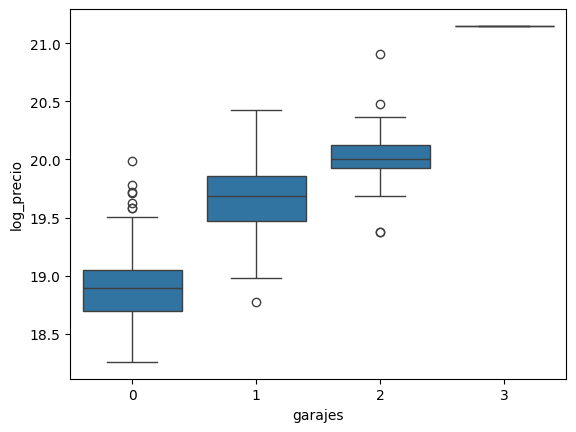

In [15]:
import seaborn as sns
sns.boxplot(x='garajes', y='log_precio', data=df)


#### Las variables relevantes tienen sentido económico y la importancia está bien distribuida (sin sesgos extremos).

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

print(" Importancia por permutación:")
display(perm_importances.head(10))


🎯 Importancia por permutación:


garajes                  0.248909
área                     0.173450
administración           0.058950
estrato                  0.055600
Localidad_USME           0.021344
antiguedad               0.011113
Tasa_Hurtos_100k         0.004660
baños                    0.004452
elevadores               0.004190
tipo_de_inmueble_Casa    0.001460
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_2436\698662249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


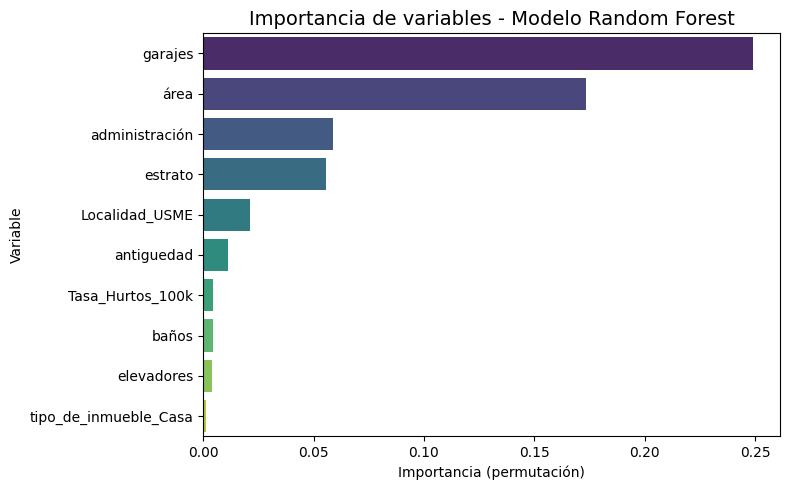

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las 10 variables más importantes
top_features = perm_importances.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Importancia de variables - Modelo Random Forest", fontsize=14)
plt.xlabel("Importancia (permutación)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


#### Gráfica: Predicciones vs Valores Reales
a nube de puntos está muy alineada con la línea roja, eso significa que las predicciones del modelo son muy cercanas a los valores reales.

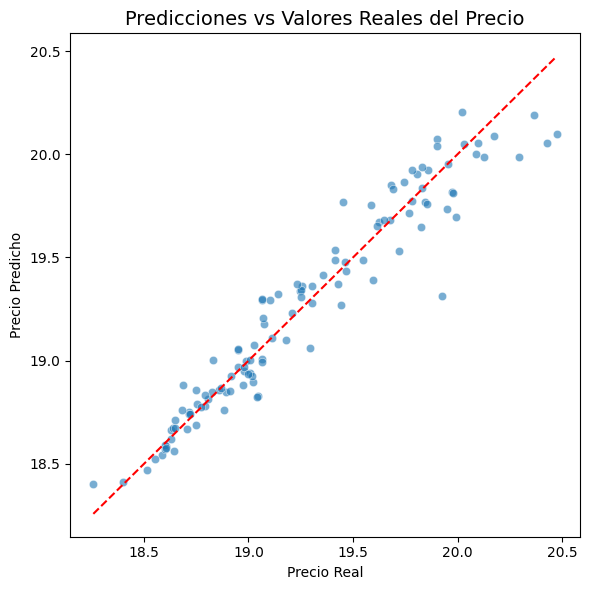

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya tienes:
# y_test (valores reales)
# y_pred (predicciones del modelo)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales del Precio', fontsize=14)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.tight_layout()
plt.show()


#### El modelo explica el 93.1 % de la variabilidad del precio.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE (Error Absoluto Medio): {mae:.2f}")
print(f" RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f" R² (Coeficiente de Determinación): {r2:.3f}")


📏 MAE (Error Absoluto Medio): 0.10
📐 RMSE (Raíz del Error Cuadrático Medio): 0.14
🎯 R² (Coeficiente de Determinación): 0.931


#### Distribución de Errores
Una forma simétrica y centrada en 0, lo que indica errores sin sesgo sistemático

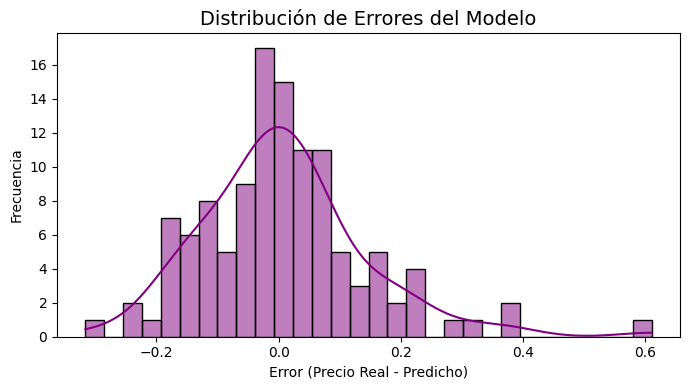

In [20]:
errors = y_test - y_pred

plt.figure(figsize=(7,4))
sns.histplot(errors, bins=30, kde=True, color='purple')
plt.title("Distribución de Errores del Modelo", fontsize=14)
plt.xlabel("Error (Precio Real - Predicho)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
